In [1]:
import nltk
import re
from nltk.corpus import wordnet
from wordcloud import WordCloud

** Operações com Python **

In [2]:
frase = 'Python eh uma linguagem fenomenal'; frase

'Python eh uma linguagem fenomenal'

In [3]:
frase2 = ' para qualquer cientista de dados'

In [4]:
frase + frase2

'Python eh uma linguagem fenomenal para qualquer cientista de dados'

In [5]:
['Segunda','Terça','Quarta'] + ['Quinta','Sexta','Sábado']

['Segunda', 'Ter\xc3\xa7a', 'Quarta', 'Quinta', 'Sexta', 'S\xc3\xa1bado']

In [8]:
frase2[0:15]

' para qualquer '

**Objeto String**

In [11]:
frase2='Six six six the number of the Beast'
frase2 = frase2.lower()
frase2.count('six')

3

In [12]:
len(frase2)

35

** Varrer Strings**

In [13]:
frase2.index('cientista')

ValueError: ignored

In [14]:
frase2[14:35]

'e number of the beast'

**Join**

In [15]:
lista = ['hot','dog']
' '.join(lista)


'hot dog'

**Trabalhando com a NLTK **

In [16]:
frase = 'Python eh uma linguagem fenomenal'
palavras = nltk.word_tokenize(frase); palavras

LookupError: ignored

In [ ]:
from nltk import FreqDist
frequencia = FreqDist(['six','six','six','Iron Maiden','the','Best','Iron Maiden','forever'])
frequencia

FreqDist({'Best': 1, 'Iron Maiden': 2, 'forever': 1, 'six': 3, 'the': 1})

In [ ]:
print (frequencia.values())

[2, 1, 3, 1, 1]


In [ ]:
frequencia.max()

'six'

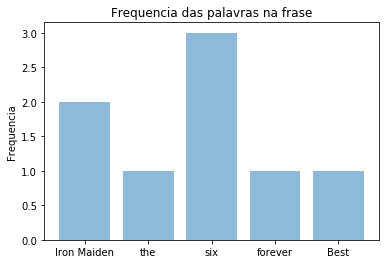

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

palavras = frequencia.keys()
y_pos = np.arange(len(palavras))
contagem = frequencia.values()

plt.bar(y_pos, contagem, align='center', alpha=0.5)
plt.xticks(y_pos, palavras)
plt.ylabel('Frequencia')
plt.title('Frequencia das palavras na frase')

plt.show()


**Pre Processing**

** Expressões reculares**

In [ ]:
texto = 'O numero da nossa casa 56, apto 306'
re.sub('[-|0-9]',' ', texto)

'O numero da nossa casa   , apto    '

In [ ]:
texto = "i'm back baby!!!, Data Science ??;;;()"
re.sub(r'[-./?!,":;()\']',' ',texto)

'i m back baby     Data Science        '

** Stemming**

In [ ]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('frequentemente')
stemmer.stem('copiar')

u'copi'

In [ ]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras=[]
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))


In [ ]:
Stemming('Ele trabalhava frequentemente no projeto de criacao de novos produtos')

u'ele trabalh frequ no projet de criaca de nov produt'

** Stopwords**

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [ ]:
stopwords

In [ ]:
def RemoviStopWords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
RemoviStopWords('Ola mundo, estou trabalhando com textos com o artigo do minerando dados')

'ola mundo, trabalhando textos artigo minerando dados'

**Trabalhando com Wordnet**

In [ ]:
from nltk.corpus import wordnet
wordnet.synsets('bike')


[Synset('motorcycle.n.01'), Synset('bicycle.n.01'), Synset('bicycle.v.01')]

In [ ]:
wordnet.synset('bicycle.n.01').definition()

u'a wheeled vehicle that has two wheels and is moved by foot pedals'

In [ ]:
wordnet.synset('motorcycle.n.01').definition()

u'a motor vehicle with two wheels and a strong frame'

In [ ]:
wordnet.synset('bicycle.n.01').hyponyms()

[Synset('bicycle-built-for-two.n.01'),
 Synset('mountain_bike.n.01'),
 Synset('ordinary.n.04'),
 Synset('push-bike.n.01'),
 Synset('safety_bicycle.n.01'),
 Synset('velocipede.n.01')]

In [ ]:
wordnet.synset('bicycle.n.01').hypernyms()

[Synset('wheeled_vehicle.n.01')]

In [ ]:
wordnet.synset('bicycle.n.01').part_meronyms()

[Synset('bicycle_seat.n.01'),
 Synset('bicycle_wheel.n.01'),
 Synset('chain.n.03'),
 Synset('coaster_brake.n.01'),
 Synset('handlebar.n.01'),
 Synset('kickstand.n.01'),
 Synset('mudguard.n.01'),
 Synset('pedal.n.02'),
 Synset('sprocket.n.02')]

** Sentiwordnet**

In [ ]:
from nltk.corpus import sentiwordnet as swn


In [ ]:
print (swn.senti_synset('love.n.01'))

<love.n.01: PosScore=0.625 NegScore=0.0>


In [ ]:
print (swn.senti_synset('sad.a.01'))

<sad.a.01: PosScore=0.125 NegScore=0.75>


** Part of Speech**

In [ ]:
text = nltk.word_tokenize("Hi, my name is Rodrigo, I want to print the outstanding invoice")
nltk.pos_tag(text)



[('Hi', 'NNP'),
 (',', ','),
 ('my', 'PRP$'),
 ('name', 'NN'),
 ('is', 'VBZ'),
 ('Rodrigo', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('print', 'VB'),
 ('the', 'DT'),
 ('outstanding', 'JJ'),
 ('invoice', 'NN')]

In [ ]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [ ]:
text = nltk.word_tokenize("My print is very good")
nltk.pos_tag(text)

[('My', 'PRP$'),
 ('print', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('good', 'JJ')]

In [ ]:
text = nltk.word_tokenize("O Blog minerando dados é muito Bom")
nltk.pos_tag(text)

[('O', 'NNP'),
 ('Blog', 'NNP'),
 ('minerando', 'FW'),
 ('dados', 'NN'),
 ('\xc3\xa9', 'NNP'),
 ('muito', 'NN'),
 ('Bom', 'NNP')]

**Word Cloud**

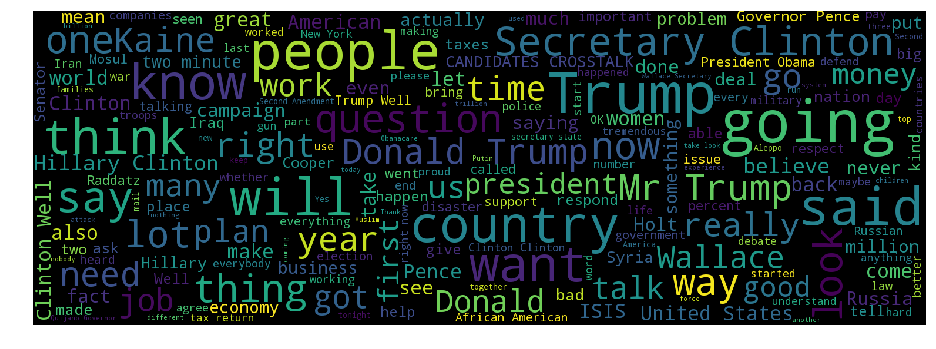

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = open('debate.csv','r').read()
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(text)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()